## PS1 Part 2: Unsupervised Linear Models

### Toy Dataset
For this problem, you will use the data file hb.csv. The input is 2,280 data points, each of which is 7
dimensional (i.e., input csv is 2280 rows by 7 columns). Use Principal Component Analysis
(either an existing library, or through your own implementation by taking the SVD of the
Covariance Matrix) for the follow tasks.

In [1]:
%matplotlib inline
import pandas
url = "https://raw.githubusercontent.com/IDEALLab/ML4ME_Textbook/main/problems/hb.csv"
data = pandas.read_csv(url,header=None)
#data.head()

### Task 1
Assuming that the 7-dimensional space is excessive, you would like to reduce the dimension of the space. However, what dimensionality of space should we reduce it to? To determine this we need to compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

Note: this information content is called the “explained variance” of each component, but you can also get this from the magnitude of the singular values. This plot is sometimes called a “Scree Plot”.

In [ ]:
# Code Here

**Question:** Approximately how many components dominate the space?, and what does this tell us about the intrinsic dimensionality of the space?

**Response**:

#### Task 2
Now use PCA to project the 7-dimensional points on the K-dimensional space (where K is your answer from above) and plot the points. (For K=1,2, or 3, use a 1, 2, or 3D plot, respectively. For 4+ dimensions, use a grid of pairwise 2D Plots, like the Scatter Matrix we used in class).

In [ ]:
# Code Here

**Question:** What do you notice?

**Response**:

### Topology Optimization Dataset
For this problem, you will be using unsupervised linear models to help understand and interpret the results of a mechanical optimization problem. Specifically, to understand the solution space generated by a topology optimization code; that is, the results of finding the optimal geometries for minimizing the compliance of various bridge structures with different loading conditions. The input consists of 1,000 images of optimized material distribution for a beam as described in *Figure 1*. A symmetrical boundary condition, left side, is used to reduce the analysis to only half. Also, a rolling support is included at the lower right corner. Notice that the rolling support is the only support in the vertical direction.

&nbsp;

<center>
<img src="beam_description.jpg" alt="Beam description" style="max-width:100%;height:auto;">
</center>
<center>Figure 1: Left: Nx-by-Ny design domain for topology optimization problem. Right: Example loading configuration and resulting optimal topology. Two external forces, Fi, were applied to the beam at random nodes represented by (xi, yi) coordinates.<sup>1</sup></center>

&nbsp;

Use Principal Component Analysis (either an existing library, or through your own implementation by taking the SVD of the Covariance Matrix) for the follow tasks.

<sup>1. This problems data is based on the problem setup seen in the following paper: Ulu, E., Zhang, R., & Kara, L. B. (2016). A data-driven investigation and estimation of optimal topologies under variable loading configurations. *Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization*, 4(2), 61-72.</sup>

The images are 217 pixels high and 434 pixels wide
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


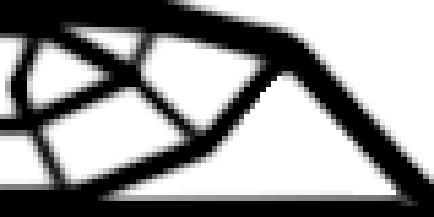

In [9]:
# To help you get started, the below code will load the images from the associated image folder:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import requests, zipfile, io

#im_dir = './topo_opt_runs/'
url = "https://raw.githubusercontent.com/IDEALLab/ML4ME_Textbook/main/problems/topo_opt_runs.zip"
resp = requests.get(url)
resp.raise_for_status()
zf = zipfile.ZipFile(io.BytesIO(resp.content))

images = []
for name in sorted(zf.namelist()):
    with zf.open(name) as f:
        img = Image.open(f).convert('L')
        images.append(np.asarray(img))

height,width = images[0].shape
print('The images are {:d} pixels high and {:d} pixels wide'.format(height,width))

# Print matrix corresponding to the image:
print(images[-1])
# And show example image, so you can see how matrix correponds:
img

### Task 1: Scree/Singular Value Plot
As with the toy example, assume that the 94,178-dimensional space is excessive. You would like to reduce the dimension of the image space. First compute its intrinsic dimensionality. For this application, "good enough" means capturing 95% of the variance in the dataset. How many dimensions are needed to capture at least 95% of the variance in the provided dataset? Store your answer in numDimsNeeded. (Hint: A Scree plot may be helpful, though visual inspection of a graph may not be precise enough.)

**Question:** Approximately how many components dominate the space? What does this tell us about the intrinsic dimensionality of the space?

**Response**:

### Task 2: Principal Components
Now plot the first 5 principal components. Hint: looking at each of these top 5 principal components; do they make sense physically, in terms of what it means for where material in the bridge is placed? Compare, for example, the differences between the 1st and 2nd principal component?